Yurag, Marivient Alexia R.

BSCS - IS - 4B

**EXERCISE 4: Object Detection and Recognition**

TASKS COVERED:

1.  HOG (Histogram of Oriented Gradients) Object Detection

2. YOLO (You Only Look Once) Object Detection

3. SSD (Single Shot MultiBox Detector) with TensorFlow

4. Traditional vs. Deep Learning Object Detection Comparison

**Task 1: : HOG (Histogram of Oriented Gradients) Object Detection**





Import Necessary Libraries

In [ ]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

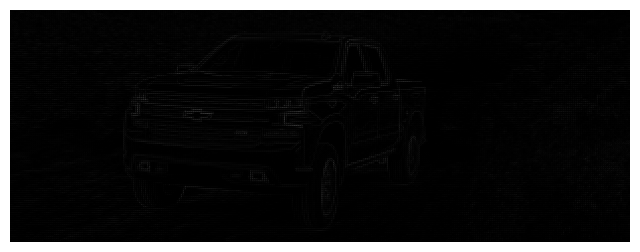

In [ ]:
# Load an image
image = cv2.imread('car.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply HOG descriptor
features, hog_image = hog(
        gray_image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True
    )

    # Normalize the HOG image to improve brightness
hog_image = (hog_image - hog_image.min()) / (hog_image.max() - hog_image.min())

    # Display the HOG image
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(hog_image, cmap='gray')
plt.show()

**Task 2: YOLO (You Only Look Once) Object Detection**

Import Necessary Libraries

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO  # Import the YOLO class from the ultralytics package
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab


0: 256x640 1 truck, 650.0ms
Speed: 5.4ms preprocess, 650.0ms inference, 38.1ms postprocess per image at shape (1, 3, 256, 640)


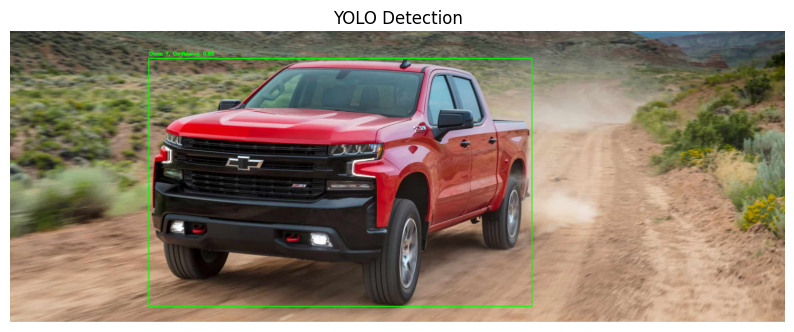

In [ ]:
# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model

# Load an image
image = cv2.imread('car.jpg')

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# Perform inference
results = model(image)

# Process results
for result in results:
    boxes = result.boxes  # Get the boxes from the detection results
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].numpy()  # Get the bounding box coordinates
        conf = box.conf[0].item()  # Get the confidence score
        class_id = int(box.cls[0].item())  # Get the class ID

        if conf > 0.5:  # Filter out low confidence detections
            label = f"Class: {class_id}, Confidence: {conf:.2f}"
            # Draw bounding box and label
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with detections using cv2_imshow
#cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow()

# Additionally, using matplotlib to show the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper color display
plt.axis('off')
plt.title('YOLO Detection')
plt.show()


**Task 3: SSD (Single Shot MultiBox Detector) with TensorFlow**

Import Necessary Libraries

In [ ]:
# Install required packages if not already done
!pip install tensorflow opencv-python matplotlib

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

Available signatures:
default
Output from model:
detection_class_labels: (100,)
detection_boxes: (100, 4)
detection_scores: (100,)
detection_class_names: (100,)
detection_class_entities: (100,)


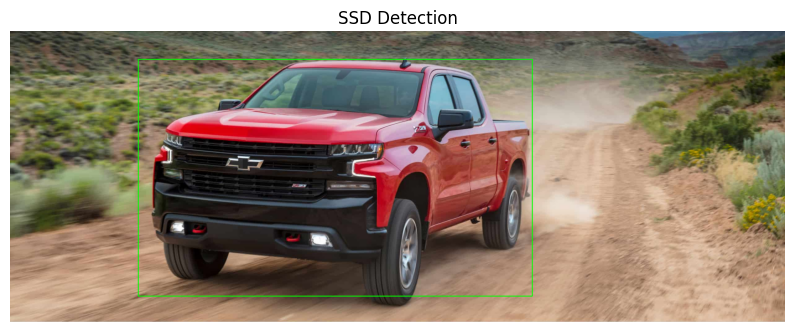

In [ ]:
# Load pre-trained SSD model
model_path = '/content/openimages_model/openimages_v4_ssd_mobilenet_v2_1'  # Path to the model directory
model = tf.saved_model.load(model_path)

# Print available signatures
print("Available signatures:")
for signature_key in model.signatures.keys():
    print(signature_key)

# Access the appropriate serving function
infer = model.signatures['default']  # Using 'default' as the key

# Load image
image_path = 'car.jpg'  # Make sure this image is uploaded to Colab
image_np = cv2.imread(image_path)
image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert the image to a tensor and add batch dimension
input_tensor = tf.convert_to_tensor(image_np, dtype=tf.float32)  # Convert to float32
input_tensor = input_tensor[tf.newaxis, ...]

# Normalize the pixel values to [0, 1] range
input_tensor /= 255.0

# Run the model
detections = infer(input_tensor)

# Print the output to check the structure
print("Output from model:")
for key, value in detections.items():
    print(f"{key}: {value.shape}")

# Get the number of detections
num_detections = int(detections['detection_scores'].shape[0])  # Get number of detections

# Visualize the bounding boxes
for i in range(num_detections):
    if detections['detection_scores'][i] > 0.5:  # Confidence threshold
        # Get bounding box coordinates
        ymin, xmin, ymax, xmax = detections['detection_boxes'][i].numpy()
        (left, right, top, bottom) = (xmin * image_np.shape[1], xmax * image_np.shape[1],
                                      ymin * image_np.shape[0], ymax * image_np.shape[0])

        # Draw bounding box
        cv2.rectangle(image_np, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_np)
plt.axis('off')
plt.title('SSD Detection')
plt.show()

**Task 4: Traditional vs. Deep Learning Object Detection Comparison**


0: 256x640 1 truck, 202.3ms
Speed: 4.3ms preprocess, 202.3ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 640)


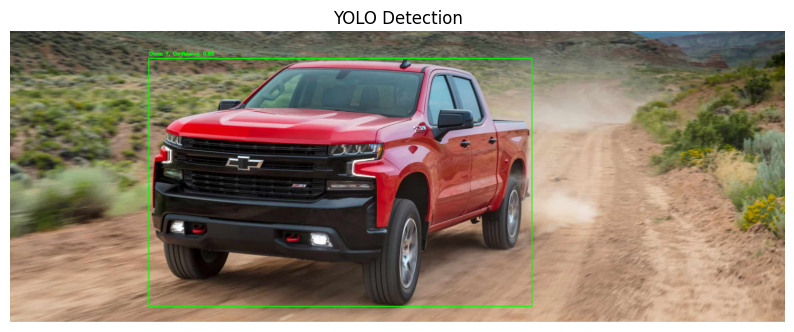

YOLO Processing Time: 0.3682 seconds


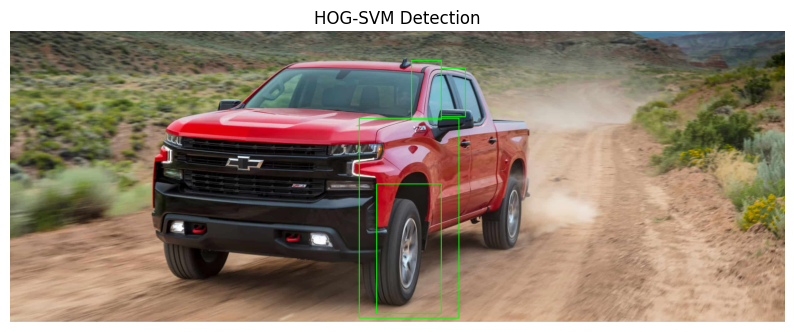

HOG-SVM Processing Time: 2.3900 seconds


In [16]:
def display_image(image, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper color display
    plt.axis('off')
    plt.title(title)
    plt.show()

# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model

# Load an image for detection
image_path = 'car.jpg'
image_yolo = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_yolo is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# --------- YOLO Detection ---------
start_time_yolo = time.time()  # Start time for YOLO speed measurement
results = model(image_yolo)  # Perform inference
end_time_yolo = time.time()  # End time for YOLO speed measurement

# Process YOLO results
for result in results:
    boxes = result.boxes  # Get the boxes from the detection results
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].numpy()  # Get the bounding box coordinates
        conf = box.conf[0].item()  # Get the confidence score
        class_id = int(box.cls[0].item())  # Get the class ID

        if conf > 0.5:  # Filter out low confidence detections
            label = f"Class: {class_id}, Confidence: {conf:.2f}"
            # Draw bounding box and label
            cv2.rectangle(image_yolo, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image_yolo, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display YOLO detection results
display_image(image_yolo, 'YOLO Detection')
print(f"YOLO Processing Time: {end_time_yolo - start_time_yolo:.4f} seconds")


# --------- HOG-SVM Detection ---------
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load the same image for HOG-SVM detection
image_hog = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_hog is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# Perform HOG detection
start_time_hog = time.time()  # Start time for HOG speed measurement
boxes, weights = hog.detectMultiScale(image_hog, winStride=(8, 8), padding=(8, 8), scale=1.05)
end_time_hog = time.time()  # End time for HOG speed measurement

# Draw bounding boxes on the HOG-SVM image
for (x, y, w, h) in boxes:
    cv2.rectangle(image_hog, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display HOG-SVM detection results
display_image(image_hog, 'HOG-SVM Detection')
print(f"HOG-SVM Processing Time: {end_time_hog - start_time_hog:.4f} seconds")